# 

In [205]:
#Linear Regression practice

In [206]:
import csv
import torch

dataset = open("Salary_dataset.csv")
reader = csv.reader(dataset)

YearsExperience = x1inputs = []
Salary = ys = []

next(reader)
for row in reader:
    YearsExperience.append(float(row[1]))
    Salary.append(float(row[2])/10000)


In [207]:
YearsExperience[:5], Salary[:5]

([1.2000000000000002, 1.4000000000000001, 1.6, 2.1, 2.3000000000000003],
 [3.9344, 4.6206, 3.7732, 4.3526, 3.9892])

In [208]:
#  model(theta, x) = theta0*x0 + theta1*x1
#  => theta matrix * x matrix
x0 = torch.ones(len(x1inputs))
x0 = torch.unsqueeze(x0, 1)

x1 = torch.tensor(x1inputs)
x1 = torch.unsqueeze(x1, 1)

x1.shape, x0.shape

(torch.Size([30, 1]), torch.Size([30, 1]))

In [209]:
features = torch.cat((x0,x1),dim = 1)
features[:5]

tensor([[1.0000, 1.2000],
        [1.0000, 1.4000],
        [1.0000, 1.6000],
        [1.0000, 2.1000],
        [1.0000, 2.3000]])

In [210]:
ys = torch.tensor(ys)
parameters = torch.randn(2, requires_grad = True)
parameters.is_leaf

True

In [211]:
def model(parameters, features):
    return features @ parameters

In [212]:
outs = model(parameters, features)

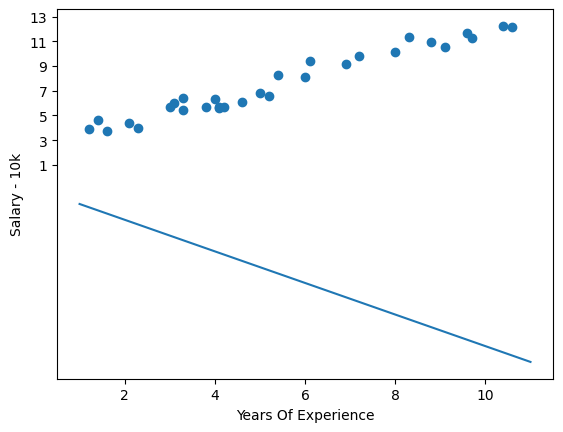

In [213]:
#Initial Line and Plot. Now we gotta tune the parameters
def plot():
    xs = []
    ys = []
    for i in range(1, 12):
        x1 = torch.tensor([i]).float()
        x1 = torch.unsqueeze(x1,1)
        x0 = torch.ones(1,1)
        features = torch.cat((x0, x1), dim = 1)
        outs = model(parameters, features).sum()
        xs.append(i)
        ys.append(outs.item())
    
    p.xlabel('Years Of Experience')
    p.ylabel('Salary - 10k')
    
    p.plot(xs ,ys)
    p.scatter(YearsExperience, Salary)
    p.yticks(range(1, 15, 2))           # sets y-axis limits


plot()

In [214]:
outs = features @ parameters
loss = (outs - ys) ** 2
counts = len(outs)
loss = loss.sum()
meanLoss = loss / counts
meanLoss

tensor(275.5831, grad_fn=<DivBackward0>)

Starting Mean Loss: 275.5830993652344
Ending Mean Loss: 0.3132043778896332


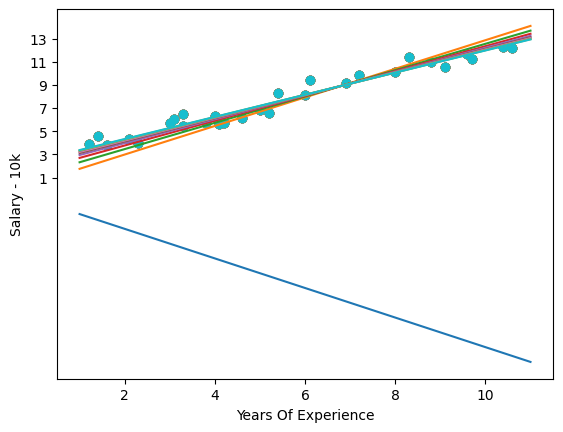

In [215]:
print("Starting Mean Loss:", meanLoss.item())
for i in range(1000):
    plot() if i % 100 == 0 else None
    outs = features @ parameters
    loss = (outs - ys) ** 2
    counts = len(outs)
    loss = loss.sum()
    meanLoss = loss / counts
    meanLoss.backward()
    
    with torch.no_grad():
        parameters -= 0.01 * parameters.grad
        parameters.grad.zero_()

    
print("Ending Mean Loss:", meanLoss.item())

In [216]:
import matplotlib.pyplot as p

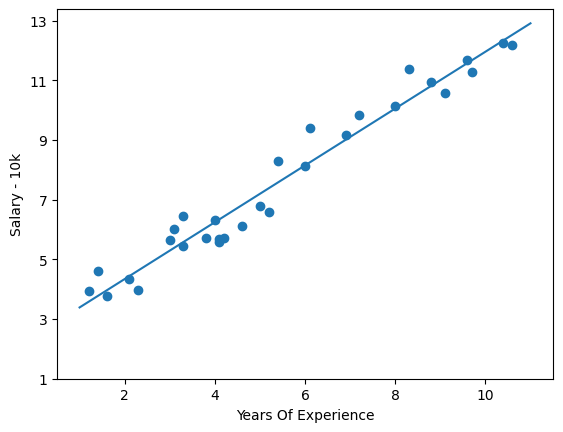

In [217]:
plot()